In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats



from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, auc

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import functions
import plot


%load_ext autoreload
%autoreload 2

sns.set()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
columns = ['DEP', 'PT', 'AGE', 'GT', 'EL', 'SC', 'CO', 'FA', 'ST']

## Data Import & Cleaning

Psychological Operations Assessment and Selection (POAS)

In [152]:
poas_filepath = '../data/poas'
poas_filenames = ['poas16.xlsx', 'poas17.xlsx', 'poas18.xlsx', 'poas19.xlsx', 'poas20.xlsx', 'poas21.xlsx', 'poas22.xlsx']


poas = functions.clean_data(poas_filepath, poas_filenames, columns)
poas.to_excel('../data/poas/poas.xlsx', index=False)
poas.sample(5)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,LANG,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE
2530,SPC,W,12C,T,T,F,252,HSD,M,2,...,0,112,121,118,122,122,118,F,PFA FAILURE,PFA
1162,SGT,B,91A,T,F,F,261,HSD,S,0,...,0,114,110,112,110,110,113,F,APFT FAILURE,APFT
2296,CPL,W,74D,T,F,F,282,4 YR,M,0,...,0,112,111,113,110,111,112,F,SELECT,SEL
1051,SPC,W,13R,T,T,F,243,GED,M,1,...,1,128,122,122,121,123,124,F,SELECT,SEL
477,SGT,W,91B,T,F,F,249,GED,M,3,...,1,130,125,123,123,124,125,F,SELECT,SEL


Special Forces Assesment and Selection (SFAS)

In [153]:
sfas_filepath = '../data/sfas'
sfas_filenames = ['sfas16.xlsx', 'sfas17.xlsx', 'sfas18.xlsx', 'sfas19.xlsx', 'sfas20.xlsx', 'sfas21.xlsx', 'sfas22.xlsx']

sfas = functions.clean_data(sfas_filepath, sfas_filenames, columns)
poas.to_excel('../data/sfas/sfas.xlsx', index=False)
sfas.sample(5)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,LANG,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE
1983,SPC,W,13B,T,F,F,261,HSD,S,0,...,1,117,118,116,117,116,116,F,APFT FAILURE,APFT
7044,SPC,W,14E,T,F,F,281,HSD,M,1,...,0,100,98,96,99,99,97,F,PFA FAILURE,PFA
5987,PFC,W,14P,T,F,F,252,HSD,S,0,...,0,111,104,105,102,103,105,T,VOLUNTARY WITHDRAW,VW
3701,SGT,H,19K,T,F,F,246,HSD,M,2,...,1,116,112,112,111,111,112,T,INVOLUNTARY WITHDRAW,IVW
2243,SFC,C,25U,T,T,T,294,1YR,M,2,...,1,113,112,111,110,111,111,T,INVOLUNTARY WITHDRAW,IVW


## Initial Overview

View of overall data

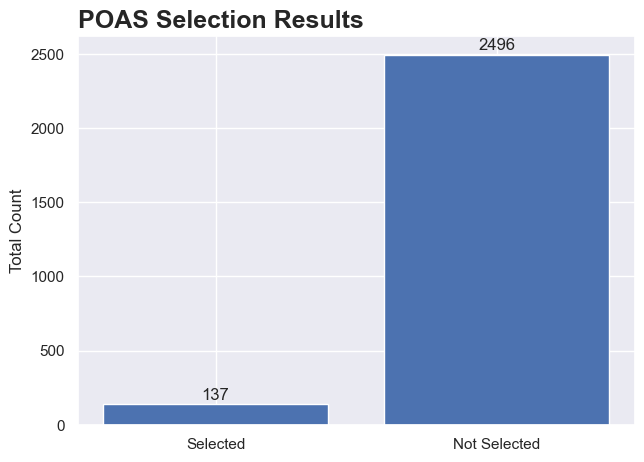

In [154]:
poas_selected = functions.equal_column_val(poas, 'RESULT', 'SELECTED')
poas_not_selected = functions.not_column_val(poas, 'RESULT', 'SELECTED')

outcome = [poas_selected.RESULT.count(), poas_not_selected.RESULT.count()]


plot.select_bar_plot(outcome, ['Selected', 'Not Selected'] , 'POAS Selection Results', 'Total Count')


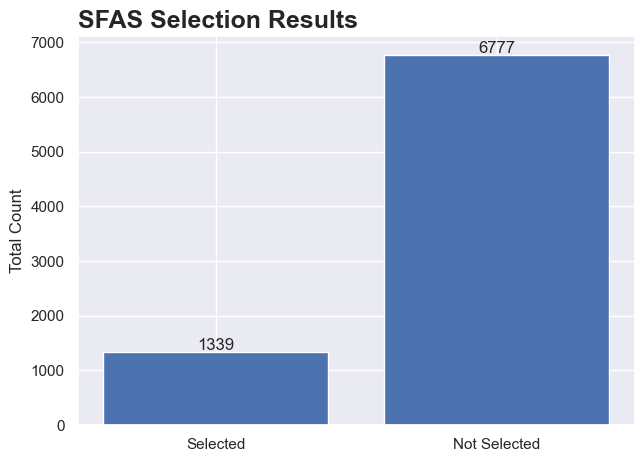

In [156]:
sfas_selected = functions.equal_column_val(sfas, 'RESULT', 'SELECTED')
sfas_not_selected = functions.not_column_val(sfas, 'RESULT', 'SELECTED')

outcome = [sfas_selected.RESULT.count(), sfas_not_selected.RESULT.count()]


plot.select_bar_plot(outcome, ['Selected', 'Not Selected'] , 'SFAS Selection Results', 'Total Count')

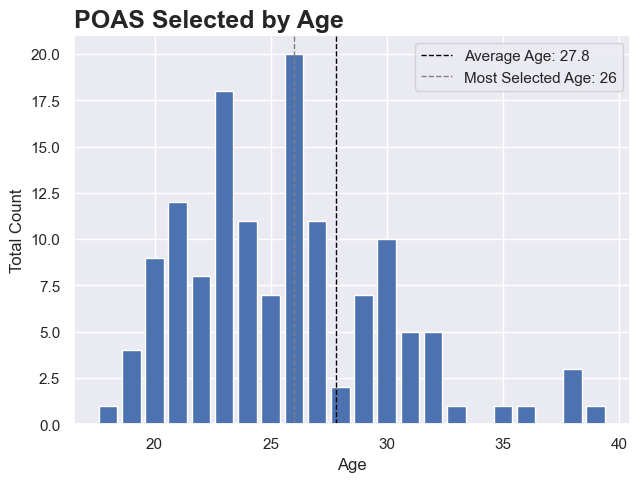

In [157]:
poas_ages = poas_selected.groupby('AGE').size().reset_index(name='counts')
poas_avg_age = poas_ages.mean()
poas_most_age = poas_ages.loc[poas_ages['counts'].idxmax(), 'AGE']

plot.age_bar_plot(poas_ages['AGE'], poas_ages['counts'], 'POAS Selected by Age', 'Age', 'Total Count', poas_avg_age[0], poas_most_age)


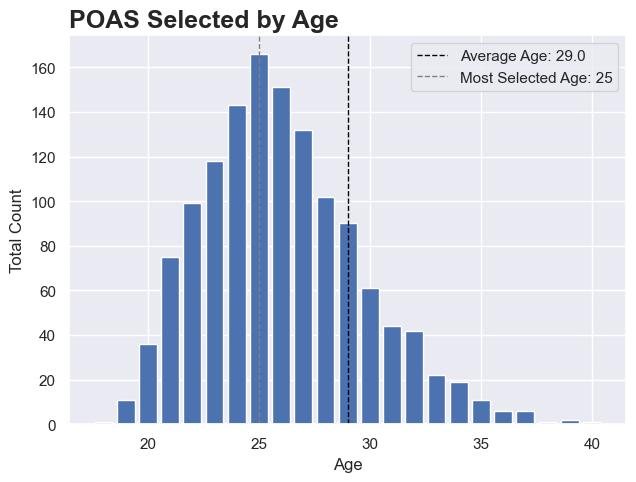

In [158]:
sfas_ages = sfas_selected.groupby('AGE').size().reset_index(name='counts')
sfas_avg_age = sfas_ages.mean()
sfas_most_age = sfas_ages.loc[sfas_ages['counts'].idxmax(), 'AGE']

plot.age_bar_plot(sfas_ages['AGE'], sfas_ages['counts'], 'POAS Selected by Age', 'Age', 'Total Count', sfas_avg_age[0], sfas_most_age)